<a href="https://colab.research.google.com/github/LauraJBenitez/Ciencia-de-Datos/blob/main/Taller_M%C3%B3dulo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **¿De qué dependen los ingresos que recibo en mi Airbnb?**

## **Taller Módulo 5**

*   Oscar Velásquez
*   Karen Espejo
*   Laura Benítez
*   Jorge Suarez
*   Camilo Gómez


##**Contexto del negocio**

La base de datos de Airbnb presenta datos que resumen el comportamiento de los alojamientos de Bogotá publicados en la aplicación para 4 años, los cuales son agrupados por los barrios en los que se encuentran, por lo que no se dispone del mayor nivel de desagregación, sino por barrio. 

En tal sentido se planteará un modelo que permita explicar el ingreso de habitación por día, según diferentes variables explicativas, con el fin de que los nuevos o potenciales nuevos oferentes de alojamiento conozcan las zonas con mejores ingresos y qué factores pueden influir en ellos.

**Objetivo del modelo:** Presentar criterios objetivos que permitan conocer los factores que afectan el ingreso diario de habitación por día de acuerdo al sector catastral.

**Metodología a usar**: Modelo de regresión lineal múltiple, considerando que el valor de los ingresos de habitación por día es una variable continua.

## **Definición de Variables**

*   **Cod_Barrio**: Identificador único del Sector Catastral (Barrio)
*   **Barrio**: Nombre del Sector Catastral (Barrio)
*   **Vigencia**: Año en el cual fue creado el anuncio
*   **Fecha_Corte**: Mes de reporte
*   **Tipo_Aloj(M)**: (Moda estadística) del tipo de alojamiento por Sector Catastral
*   **Tipo_Alqu(M)**: Tipo de alquiler; refiere el tipo de alquiler (Moda) en el  Sector Catastral
*   **Habitaciones(P)**: Número promedio de habitaciones en el  Sector Catastral (Barrio)
*   **Tasa_O2**: Tasa de Ocupación; Obedece a: Suma de días reservados en el mes por barrio / Suma de días disponibles en el mes por barrio
*   **Ingreso_USD(S)**: Suma por Sector Catastral (Barrio), de los ingresos totales (en dólares estadounidenses) obtenidos durante el período del informe. Incluye el precio anunciado desde el momento de la reserva, así como los gastos de limpieza.
*   **Ingreso_Hab_Dia (S)**: Suma por Sector Catastral (Barrio), de los ingresos diarios por habitación (en dólares estadounidenses)
*   **ADR_USD(P)**: Tarifa diaria promedio (ADR) de noches reservadas en USD. ADR = Ingresos totales / Noches reservadas
*   **Días_Reservados(P)**: Número promedio de días calendario clasificados como reservados por Sector Catastral (Barrio)
*   **Días_Disponibles (P)**: Número promedio de días calendario clasificados como disponibles por Sector Catastral (Barrio)
*   **Baños (P)**: Número promedio de baños por Sector Catastral (Barrio)
*   **Max_Huéspedes (P)**: El número máximo promedio de huéspedes que la propiedad de alquiler de vacaciones puede acomodar
*   **Deposito_USD(P)**: Promedio del depósito de seguridad en dólares estadounidenses en el Sector Catastral (Barrio)
*   **Limpieza_USD(P)**: Promedio del coste de limpieza cobrado por reserva en dólares estadounidenses en el Sector Catastral (Barrio)
*   **ExtraPeople_USD(P)**: Promedio de la tarifa de personas extra en dólares estadounidenses en el Sector Catastral (Barrio)
*   **Public_Noct_USD(P)**: Promedio de la tarifa nocturna predeterminada para una lista de alquileres de vacaciones en dólares estadounidenses
*   **Fotos(P)**: Número promedio de fotos publicadas por Sector Catastral (Barrio)
*   **Cancelación(M)**: (Moda estadística) de la política de cancelación de la lista de alquileres vacacionales por Sector Catastral (Barrio)
*   **Calif_Comunicación(P)**: Valor promedio de la calificación por comunicación
*   **Calif-Limpieza(P)**: Valor promedio de la calificación por limpieza
*   **Calif_Localización(P)**: Valor promedio de la calificación por localización
*   **Calif_Valores(P)**: Valor promedio de la calificación Valo (Costo)
*   **Mascotas(M)**: (Moda estadística) del permiso o no de ingreso de animales de compañía
*   **Comodidades(M)**: (Moda estadística) según la cantidad de comodidades anexas
*   **Localidad**: Espacio geográfico en que se divide el área urbano y rural del municipio de Bogotá.
*   **Estrato**: Estrato Socioeconómico
*   **Cant_Propiedades(S)**: Cantidad de propiedades activas en el barrio
*   **Recaudo_P**: Promedio del predial por Barrio, Fuente: Valores Inexactos por Impuesto Predial (a nivel Sector Catastral). Bogotá D.C. Año 2018, realizado por la secretaria distrital de hacienda y dispuesto en la Infraestructura de Datos Espaciales para El Distrito Capital - IDECA
*   **Percapita**: Impuesto promedio por unidad predial: (Recaudo del predial por barrio/Número de unidades prediales en el barrio)
*   **Media_Arriendo**: corresponde al canon promedio de arriendo resultado de la encuesta multipropósito 2017 realizada por el  Departamento Administrativo Nacional de Estadística – Dane, en la cual se presentan los valores de arriendo por Unidad de Planeación Zonal – UPZ, estos valores se  adoptaron para los barrios que integran cada UPZ


















## **Configuración**

Se cargan las librerías con las que vamos a trabajar para hacer un análisis exploratorio de datos inicial.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.util.testing as tm
import pickle
import pylab as pl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.anova import anova_lm
from scipy import stats


%matplotlib inline

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


## **Cargue de datos**

La base de datos por barrio Airbnb es resultado de la agrupación de los datos registrados en la base inicial suministrada por AirDNA, esto de acuerdo a su ubicación geográfica con respecto al Sector Catastral en Bogotá. Antes de la agrupación por Sector Catastral se realizó una depuración de los datos que no reportaban días reservados o con tasa de ocupación igual a cero.
Dentro de los registros de la base de información se encuentran barrios sin dato y con variables en cero, esto refleja que con respecto al total de barrios, estos Sectores Catastrales (Barrios), no tuvieron actividad de alquiler a través de las plataformas virtuales en el mes o año correspondiente.

In [ ]:
airbnb_df = pd.read_excel('/content/barrios_airbnb-bogota-2015-2019.xlsx',sheet_name='2015-2019')
len(airbnb_df)

53452

## **Calidad de Datos**

Vamos a revisar una muestra de los datos para darnos una idea de los valores que vienen en cada columna/atributo


In [ ]:
airbnb_df.head()

,Cod_Barrio,Barrio,Vigencia,Fecha_Corte,Tipo_AlojM,Tipo_AlquM,HabitacionesP,Tasa_O2,Ingreso_USDS,Ingreso_Hab_Dia,ADR_USDP,Días_ReservadosP,Días_DisponiblesP,BañosP,Max_HuéspedesP,Deposito_USDP,Limpieza_USDP,ExtraPeople_USDP,CancelaciónM,Public_Noct_USDP,FotosP,Calif_ComunicaciónP,Calif-LimpiezaP,Calif_LocalizaciónP,Calif_ValoresP,MascotasM,ComodidadesM,Localidad,Cant_PropiedadesS,EstratoM,Percapita,Media_Arriendo
0,2507,ABRAHAM LINCOLN,2019,2019-01-01 00:00:00,Propiedad Compartida,Private room,1.0,0.064516,27.0,27.0,13.5,2.0,29.0,1.0,1.0,200.0,0.0,0.0,12,6.0,Flexible,0.0,0.0,0.0,0.0,True,0-20,TUNJUELITO,2.0,1.0,427874.08313,418232.961119
1,2507,ABRAHAM LINCOLN,2017,12/2017,Apartamento,Private room,1.0,0.032258,26.0,26.0,26.0,1.0,30.0,1.0,2.0,200.0,5.0,10.0,Flexible,25.0,2,0.0,0.0,0.0,0.0,False,Estandar,TUNJUELITO,1.0,2.0,354066.01467,418232.961119
2,2507,ABRAHAM LINCOLN,2018,06/2018,Apartamento,Private room,1.0,0.100000,45.0,45.0,15.0,3.0,27.0,1.0,2.0,200.0,5.0,10.0,Estricto,15.0,2,10.0,10.0,10.0,10.0,False,Estandar,TUNJUELITO,1.0,2.0,427874.08313,432954.761351
3,2507,ABRAHAM LINCOLN,2018,08/2018,Apartamento,Private room,1.0,0.258065,310.0,155.0,18.5,8.0,23.0,1.0,2.0,200.0,5.0,10.0,Flexible,20.0,2,10.0,10.0,10.0,10.0,False,Estandar,TUNJUELITO,2.0,2.0,427874.08313,432954.761351
4,2507,ABRAHAM LINCOLN,2019,2019-02-01 00:00:00,NaN,NaN,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,TUNJUELITO,NaN,2.0,0.00000,0.000000


También es importante conocer con anterioridad el tamaño de los datos con los que estamos tratando

In [ ]:
airbnb_df.shape

(53452, 32)

También determinaremos los tipos de dato con los que estamos tratando. Esto nos permitirá tratar cada atributo de la manera correspondiente o realizar las transformaciones necesarias.

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53452 entries, 0 to 53451
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod_Barrio           53452 non-null  int64  
 1   Barrio               53452 non-null  object 
 2   Vigencia             53452 non-null  int64  
 3   Fecha_Corte          53452 non-null  object 
 4   Tipo_AlojM           13099 non-null  object 
 5   Tipo_AlquM           13099 non-null  object 
 6   HabitacionesP        53452 non-null  float64
 7   Tasa_O2              53452 non-null  float64
 8   Ingreso_USDS         53452 non-null  float64
 9   Ingreso_Hab_Dia      53452 non-null  float64
 10  ADR_USDP             53452 non-null  float64
 11  Días_ReservadosP     53452 non-null  float64
 12  Días_DisponiblesP    53452 non-null  float64
 13  BañosP               53451 non-null  float64
 14  Max_HuéspedesP       53452 non-null  float64
 15  Deposito_USDP        53452 non-null 

Debido a que algunas variables son objetos o enteros, haremos las transformaciones de acuerdo a la necesidad que tengamos a la hora de elaborar el modelo

In [ ]:
airbnb_df['Localidad'] = airbnb_df['Localidad'].astype('category')
airbnb_df['Cod_Barrio'] = airbnb_df['Cod_Barrio'].astype('category')
airbnb_df['Vigencia'] = airbnb_df['Vigencia'].astype('category')
airbnb_df['EstratoM'] = airbnb_df['EstratoM'].astype('category')
airbnb_df['Cant_PropiedadesS'], _ = pd.factorize(airbnb_df['Cant_PropiedadesS'], sort=True)

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53452 entries, 0 to 53451
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Cod_Barrio           53452 non-null  category
 1   Barrio               53452 non-null  object  
 2   Vigencia             53452 non-null  category
 3   Fecha_Corte          53452 non-null  object  
 4   Tipo_AlojM           13099 non-null  object  
 5   Tipo_AlquM           13099 non-null  object  
 6   HabitacionesP        53452 non-null  float64 
 7   Tasa_O2              53452 non-null  float64 
 8   Ingreso_USDS         53452 non-null  float64 
 9   Ingreso_Hab_Dia      53452 non-null  float64 
 10  ADR_USDP             53452 non-null  float64 
 11  Días_ReservadosP     53452 non-null  float64 
 12  Días_DisponiblesP    53452 non-null  float64 
 13  BañosP               53451 non-null  float64 
 14  Max_HuéspedesP       53452 non-null  float64 
 15  Deposito_USDP      

Una vez transformadas las variables y con una idea más clara de la estructura de datos con la que estamos tratando, realicemos un análisis matemático rápido sobre los datos:

In [ ]:
airbnb_df.describe()

,HabitacionesP,Tasa_O2,Ingreso_USDS,Ingreso_Hab_Dia,ADR_USDP,Días_ReservadosP,Días_DisponiblesP,BañosP,Max_HuéspedesP,Deposito_USDP,Limpieza_USDP,ExtraPeople_USDP,Public_Noct_USDP,Calif_ComunicaciónP,Calif-LimpiezaP,Calif_LocalizaciónP,Calif_ValoresP,Cant_PropiedadesS,Percapita,Media_Arriendo
count,53452.000000,53452.000000,5.345200e+04,53452.000000,53452.000000,53452.000000,53452.000000,53451.000000,53452.000000,53452.000000,53452.000000,53452.000000,53452.000000,53452.000000,53452.000000,53452.000000,53452.000000,53452.00000,5.345200e+04,5.345200e+04
mean,0.370213,0.090597,1.101592e+03,86.711127,8.900144,2.353674,4.219767,0.352975,0.746904,47.693544,3.326092,2.421922,9.411694,2.199379,2.150602,2.135146,2.145176,1.89136,9.490250e+05,2.553096e+05
std,0.804159,0.195052,1.392994e+04,269.137184,41.099554,5.095773,8.235138,0.710731,1.718392,159.699732,8.451813,5.129648,30.795084,4.070433,3.981889,3.958649,3.974394,7.36176,1.119063e+07,4.761169e+05
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.00000,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00
50%,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00
75%,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00
max,20.000000,1.000000,2.803304e+06,12152.000000,5698.000000,31.000000,30.000000,19.500000,60.000000,5000.000000,623.000000,77.249240,2593.750000,10.000000,10.000000,10.000000,10.000000,131.00000,3.757597e+08,1.922674e+06


## **Datos Faltantes**

Vamos a revisar los datos faltantes de la base

In [ ]:
airbnb_df.isna().sum()

Cod_Barrio                 0
Barrio                     0
Vigencia                   0
Fecha_Corte                0
Tipo_AlojM             40353
Tipo_AlquM             40353
HabitacionesP              0
Tasa_O2                    0
Ingreso_USDS               0
Ingreso_Hab_Dia            0
ADR_USDP                   0
Días_ReservadosP           0
Días_DisponiblesP          0
BañosP                     1
Max_HuéspedesP             0
Deposito_USDP              0
Limpieza_USDP              0
ExtraPeople_USDP           0
CancelaciónM           38929
Public_Noct_USDP           0
FotosP                  1425
Calif_ComunicaciónP        0
Calif-LimpiezaP            0
Calif_LocalizaciónP        0
Calif_ValoresP             0
MascotasM              40541
ComodidadesM           40353
Localidad                  0
Cant_PropiedadesS          0
EstratoM               39897
Percapita                  0
Media_Arriendo             0
dtype: int64

Hay variables que llaman nuestra atención: Tipo_AlojM, Tipo_AlquM, CancelacionM, FotosP, MascotasM, ComodidadesM y EstratoM. 

Estas son variables categóricas y objeto, y la ausencia de datos se debe a que los alojamientos no estaban disponibles para esas fechas

Debido a que queremos determinar el valor de la noche de alojamiento, los valores nulos en esta base no nos aportan información para solucionar nuestra pregunta de negocio. Por esa razón, vamos a eliminar esos registros.

In [ ]:
airbnb_df = airbnb_df.dropna()

## **Valores Atípicos**

Para detectar datos atípicos, realizaremos gráficas por cada variable

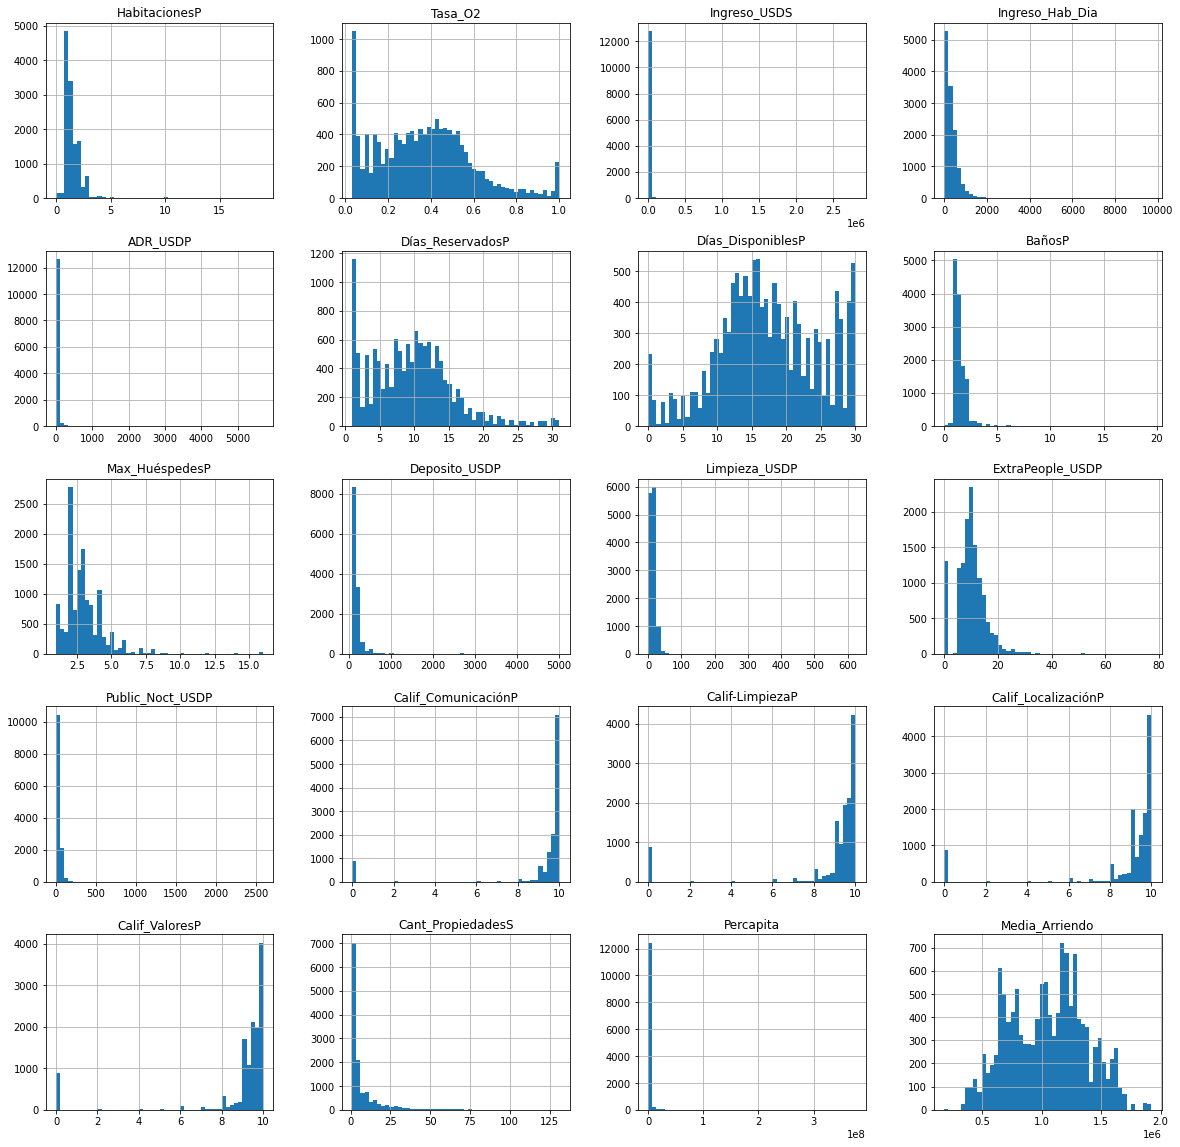

In [ ]:
pd.DataFrame.hist(airbnb_df, figsize=(20,20), bins=50);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


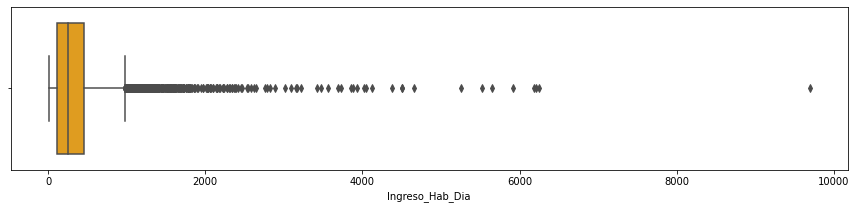

In [ ]:
plt.subplots(figsize=(15,3))
sns.boxplot(airbnb_df['Ingreso_Hab_Dia'], color='orange');

In [ ]:
airbnb_df.describe()

,HabitacionesP,Tasa_O2,Ingreso_USDS,Ingreso_Hab_Dia,ADR_USDP,Días_ReservadosP,Días_DisponiblesP,BañosP,Max_HuéspedesP,Deposito_USDP,Limpieza_USDP,ExtraPeople_USDP,Public_Noct_USDP,Calif_ComunicaciónP,Calif-LimpiezaP,Calif_LocalizaciónP,Calif_ValoresP,Cant_PropiedadesS,Percapita,Media_Arriendo
count,12909.000000,12909.000000,1.290900e+04,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,1.290900e+04,1.290900e+04
mean,1.492201,0.365489,4.530238e+03,339.035186,36.166525,9.471754,17.327680,1.435804,2.993080,194.733430,13.683437,9.946804,38.309953,9.028943,8.830046,8.764584,8.805714,7.910837,3.881357e+06,1.046262e+06
std,0.788238,0.223273,2.806570e+04,367.024103,77.014122,5.825612,7.165680,0.674088,1.517959,276.225363,12.356269,5.784365,52.388156,2.518675,2.473475,2.491620,2.484500,13.280140,2.244390e+07,3.229002e+05
min,0.000000,0.032258,6.000000e+00,8.000000,1.670000,1.000000,0.000000,0.000000,1.000000,79.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,1.816876e+05
25%,1.000000,0.193548,1.750000e+02,110.000000,18.000000,5.000000,12.666667,1.000000,2.000000,104.000000,8.000000,7.020833,18.000000,9.503018,9.058252,9.000000,9.000000,1.000000,7.134893e+05,7.742120e+05
50%,1.333333,0.361111,7.818000e+02,258.666667,26.938333,9.384615,16.800000,1.333333,2.764706,144.195652,13.359227,10.000000,30.187500,9.846154,9.595458,9.606280,9.557915,3.000000,1.228477e+06,1.058376e+06
75%,1.750000,0.501195,3.252000e+03,457.304604,40.930000,13.000000,22.666667,1.636364,3.541667,200.000000,18.632000,12.503209,46.145455,10.000000,9.981481,9.922295,9.943182,8.000000,2.068778e+06,1.276452e+06
max,19.000000,1.000000,2.803304e+06,9690.000000,5698.000000,31.000000,30.000000,19.500000,16.000000,5000.000000,623.000000,77.249240,2593.750000,10.000000,10.000000,10.000000,10.000000,131.000000,3.757597e+08,1.922674e+06


Realizando de nuevo nuestro resumen de métricas estadísticas, vemos que ya no se tienen valores faltantes en ningún atributo. La distribución de las columnas que hemos modificado ha cambiado un poco, pero su desviación y distribución en general se ajusta más para un análisis predictivo.



## **Correlación y Multicolinearidad**

Vamos a analizar visualmente la relación de las variables entre sí, así como con la variable objetivo score:

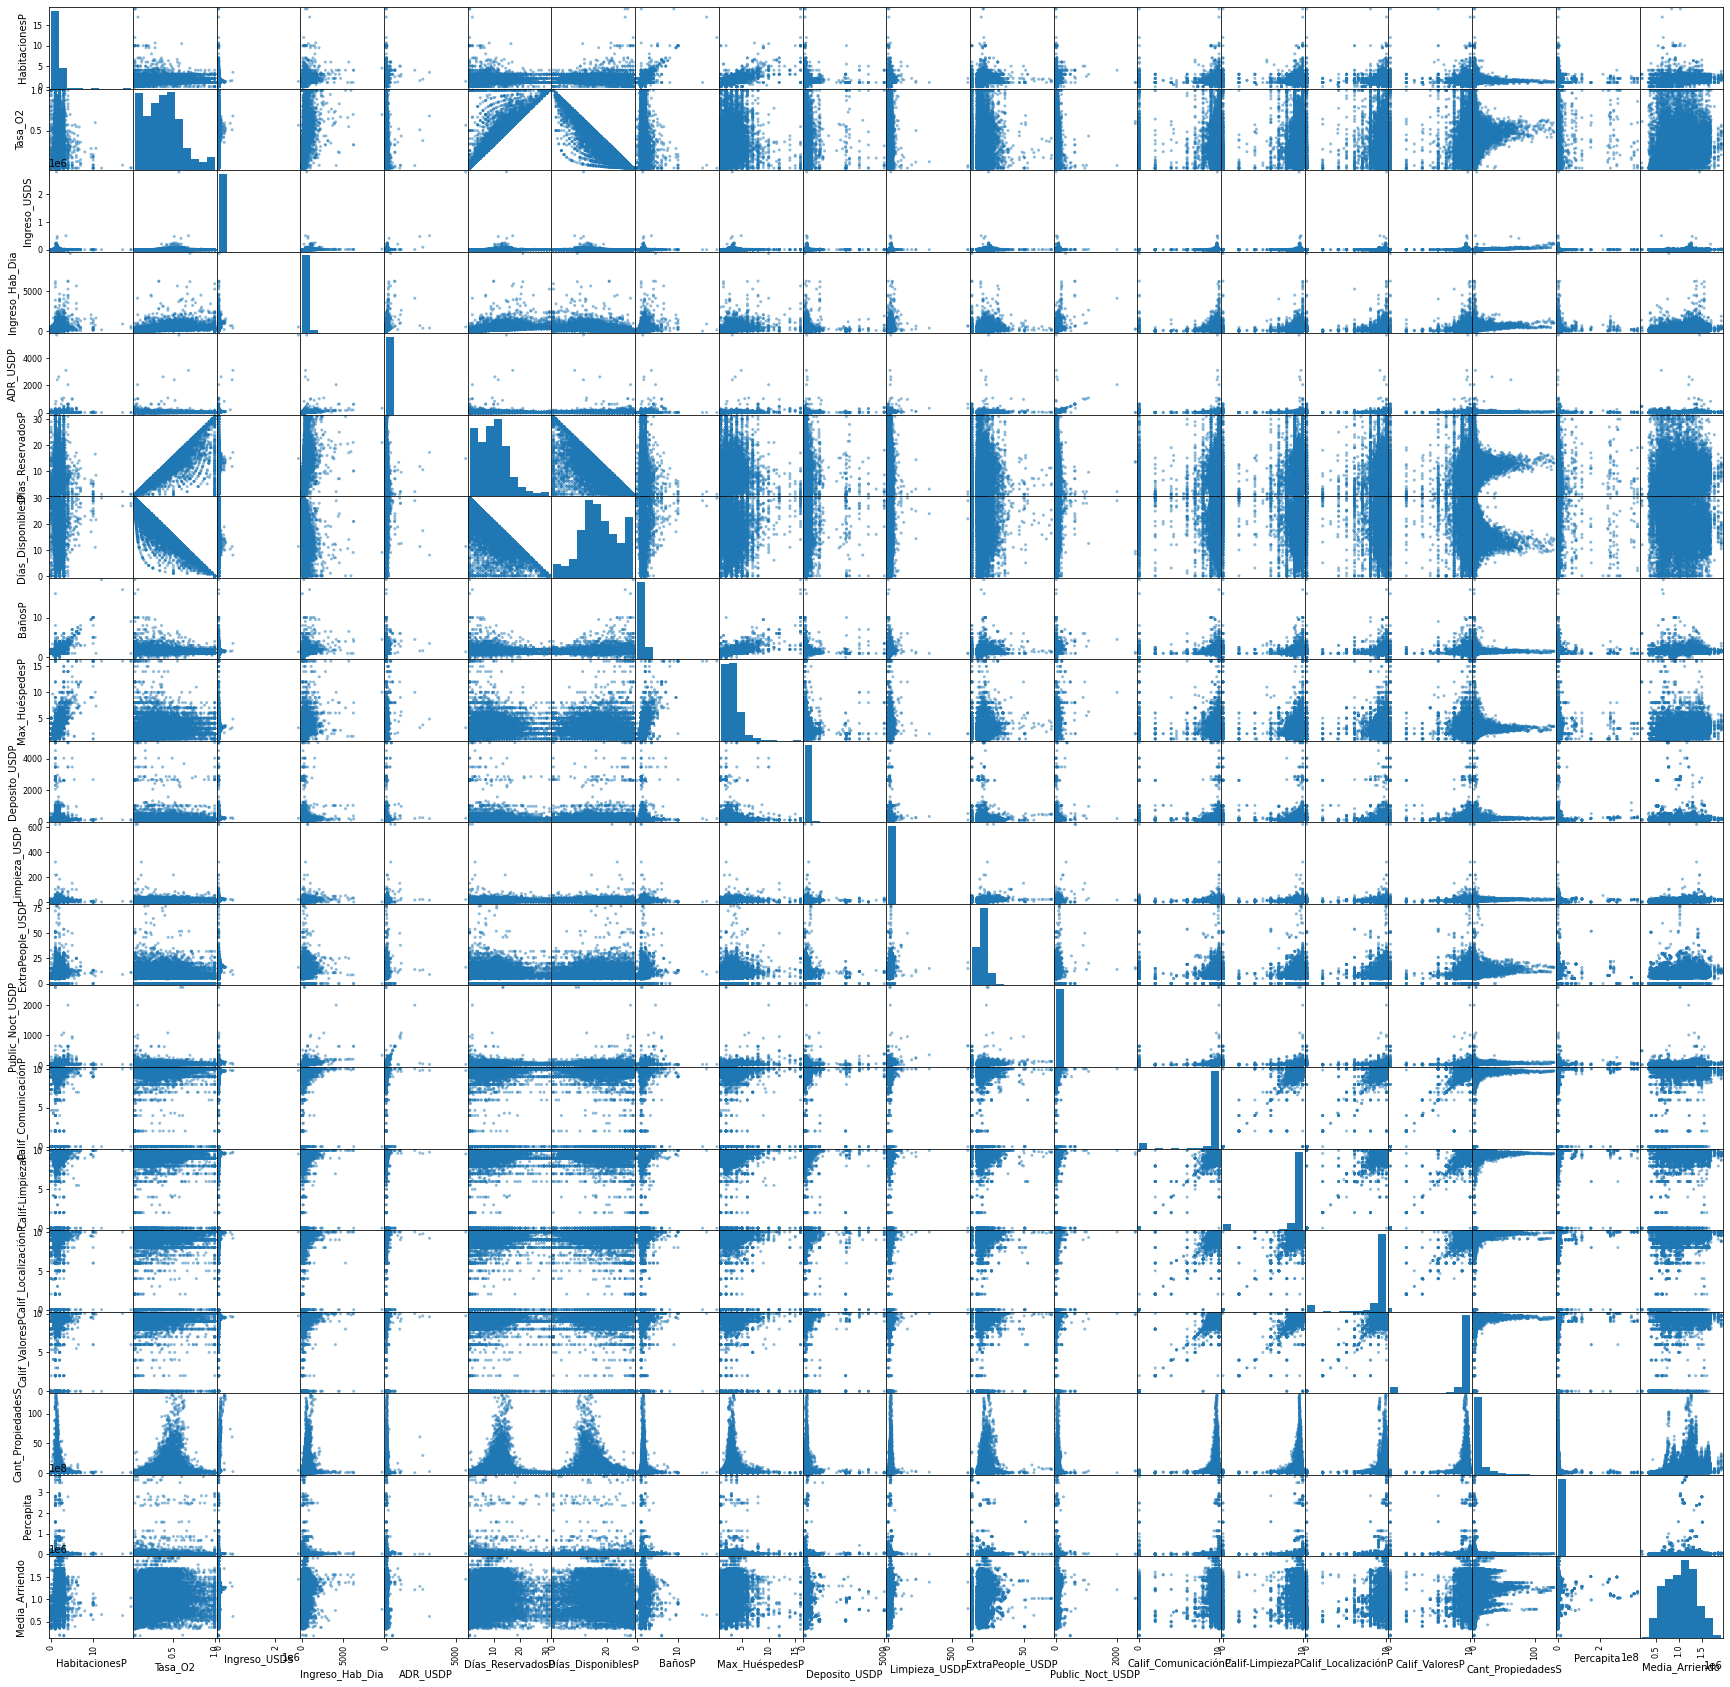

In [ ]:
pd.plotting.scatter_matrix(airbnb_df, figsize=(30,30));

In [ ]:
airbnb_df.corr()

,HabitacionesP,Tasa_O2,Ingreso_USDS,Ingreso_Hab_Dia,ADR_USDP,Días_ReservadosP,Días_DisponiblesP,BañosP,Max_HuéspedesP,Deposito_USDP,Limpieza_USDP,ExtraPeople_USDP,Public_Noct_USDP,Calif_ComunicaciónP,Calif-LimpiezaP,Calif_LocalizaciónP,Calif_ValoresP,Cant_PropiedadesS,Percapita,Media_Arriendo
HabitacionesP,1.000000,0.017192,-0.005366,0.277801,0.144300,0.015429,-0.027055,0.680610,0.717031,0.021517,0.103648,0.110667,0.198244,0.020992,0.021601,0.027083,0.018197,-0.035778,0.025808,0.059316
Tasa_O2,0.017192,1.000000,0.090167,0.479732,0.014997,0.904046,-0.936964,0.007541,0.057860,0.008464,0.122293,0.103885,0.045313,0.232718,0.229737,0.237946,0.224260,0.192622,0.031042,0.168817
Ingreso_USDS,-0.005366,0.090167,1.000000,0.149982,0.719152,0.089406,-0.090304,0.028500,0.022153,0.006045,0.078076,0.096212,0.059211,0.042274,0.046622,0.060475,0.045706,0.340195,-0.009390,0.095852
Ingreso_Hab_Dia,0.277801,0.479732,0.149982,1.000000,0.294080,0.526962,-0.423134,0.310104,0.326574,0.043423,0.297557,0.268054,0.421136,0.139830,0.146343,0.173988,0.141223,0.257400,0.019912,0.276635
ADR_USDP,0.144300,0.014997,0.719152,0.294080,1.000000,0.016619,-0.016325,0.186285,0.196395,0.054292,0.194659,0.122524,0.383658,0.011735,0.016291,0.026427,0.013477,0.077252,0.012350,0.103301
Días_ReservadosP,0.015429,0.904046,0.089406,0.526962,0.016619,1.000000,-0.789096,0.013607,0.046571,-0.017460,0.121304,0.115037,0.044039,0.226141,0.222527,0.231696,0.217996,0.189424,0.014696,0.168246
Días_DisponiblesP,-0.027055,-0.936964,-0.090304,-0.423134,-0.016325,-0.789096,1.000000,-0.008978,-0.070566,-0.008021,-0.139315,-0.116802,-0.048246,-0.253181,-0.250879,-0.260725,-0.246748,-0.208491,-0.038772,-0.194179
BañosP,0.680610,0.007541,0.028500,0.310104,0.186285,0.013607,-0.008978,1.000000,0.634139,0.042567,0.131504,0.190803,0.244426,0.022048,0.032601,0.046939,0.030262,0.041322,-0.001801,0.118204
Max_HuéspedesP,0.717031,0.057860,0.022153,0.326574,0.196395,0.046571,-0.070566,0.634139,1.000000,0.001730,0.158525,0.150709,0.282674,0.030547,0.032024,0.035582,0.023119,0.028555,0.023135,0.069926
Deposito_USDP,0.021517,0.008464,0.006045,0.043423,0.054292,-0.017460,-0.008021,0.042567,0.001730,1.000000,0.026979,0.009191,0.063141,-0.038721,-0.037275,-0.032719,-0.030959,-0.000848,0.019854,0.002061


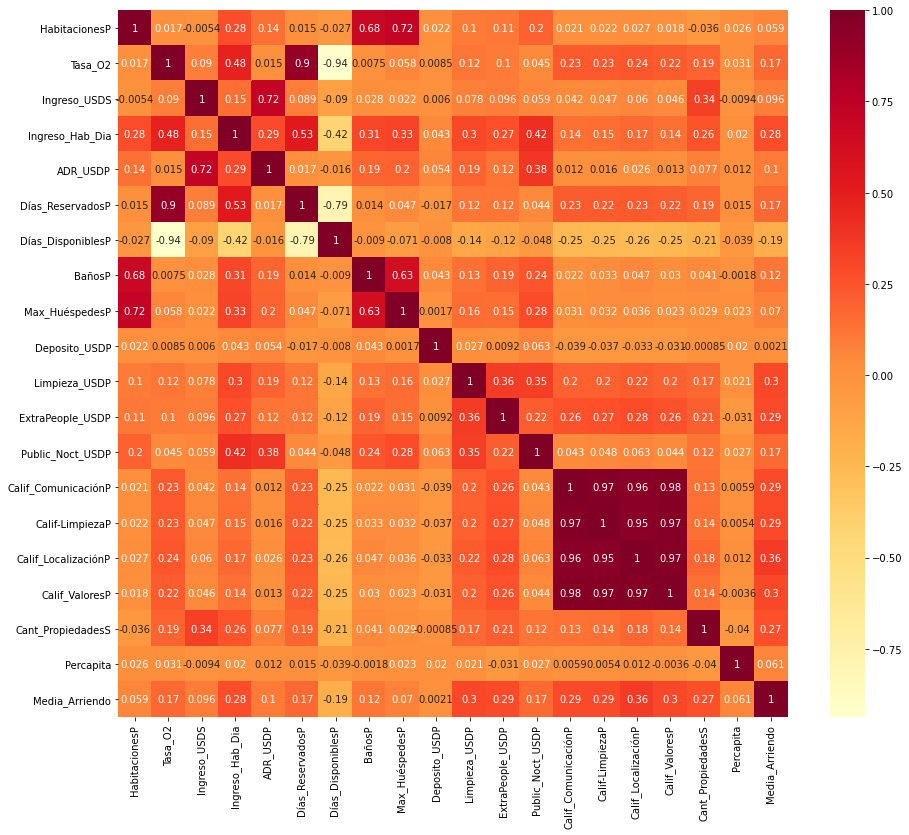

In [ ]:
plt.subplots(figsize=(15,13))
sns.heatmap(airbnb_df.corr(), annot=True, cmap='YlOrRd');

Una vez tenemos la data limpia, guardamos el archivo para poder correr el modelo de regresión

In [ ]:
airbnb_df.to_csv('/content/barrios_airbnb-bogota-2015-2019_clean.csv', index=False)

## **Construcción Modelo de Regresión**

Revisando otro estudio, identificamos que para el caso de Airbnb Madrid, los factores que son determinantes en la selección de precios, y por ende, en alguna medida los igresos, fueron: 

* Número de baños 
* Número de habitaciones 
* El propietario sea Superhost 
* Distancia al centro de la ciudad 
* Distancia a aeropuertos
* Accesibilidad al alojamiento

Así, se identifica que los resultados son intuitivos en el entendido que las variables que determinan los precios se podrían agrupar por características físicas del alojamiento, características del propietario y la ubicación del alojamiento. 

En este orden de ideas, y de acuerdo con el correlograma, tomaremos las variables cuantitativas que podrían explicar nuestra variable Ingreso_Hab_Dia:

*   Tasa_O2 (desempeño del barrio)
*   Public_Noct_USDP (ingresos por noche)
*   Max_HuéspedesP (características del alojamiento)
*   Calif_LocalizaciónP (ubicación del alojamiento)
*   Cant_PropiedadesS (competencia en el barrio)

Adicionalmente, consideramos que incluir las variables cualitativas de Estrato y Localidad, nos servirán para responder mejor a la pregunta problema.
*   EstratoM (ubicación del alojamiento)
*   Localidad (ubicación del alojamiento)



In [ ]:
airbnb_df_final = airbnb_df.filter(['Ingreso_Hab_Dia','Tasa_O2', 'Public_Noct_USDP', 'Max_HuéspedesP','Calif_LocalizaciónP','Cant_PropiedadesS','EstratoM','Tipo_AlquM', 'Localidad'])

In [ ]:
airbnb_df_final.head()

,Ingreso_Hab_Dia,Tasa_O2,Public_Noct_USDP,Max_HuéspedesP,Calif_LocalizaciónP,Cant_PropiedadesS,EstratoM,Tipo_AlquM,Localidad
0,27.000,0.064516,6.0,1.0,0.0,2,1.0,Private room,TUNJUELITO
1,26.000,0.032258,25.0,2.0,0.0,1,2.0,Private room,TUNJUELITO
2,45.000,0.100000,15.0,2.0,10.0,1,2.0,Private room,TUNJUELITO
3,155.000,0.258065,20.0,2.0,10.0,2,2.0,Private room,TUNJUELITO
46,503.965,0.403846,31.0,3.5,9.0,2,4.0,Entire home/apt,USAQUEN


Vamos a convertir en dummies las variables categóricas

In [ ]:
airbnb_df_regresion = pd.get_dummies(airbnb_df_final, columns=['EstratoM', 'Tipo_AlquM', 'Localidad'])

In [ ]:
airbnb_df_regresion.head()

,Ingreso_Hab_Dia,Tasa_O2,Public_Noct_USDP,Max_HuéspedesP,Calif_LocalizaciónP,Cant_PropiedadesS,EstratoM_1.0,EstratoM_2.0,EstratoM_3.0,EstratoM_4.0,EstratoM_5.0,EstratoM_6.0,Tipo_AlquM_Entire home/apt,Tipo_AlquM_Entire home/aptPrivate room,Tipo_AlquM_Entire home/aptShared room,Tipo_AlquM_Private room,Tipo_AlquM_Private roomShared room,Tipo_AlquM_Shared room,Localidad_ANTONIO NARIÑO,Localidad_BARRIOS UNIDOS,Localidad_BOSA,Localidad_CANDELARIA,Localidad_CHAPINERO,Localidad_CIUDAD BOLIVAR,Localidad_ENGATIVA,Localidad_FONTIBON,Localidad_KENNEDY,Localidad_LOS MARTIRES,Localidad_PUENTE ARANDA,Localidad_RAFAEL URIBE URIBE,Localidad_SAN CRISTOBAL,Localidad_SANTA FE,Localidad_SUBA,Localidad_SUMAPAZ,Localidad_TEUSAQUILLO,Localidad_TUNJUELITO,Localidad_USAQUEN,Localidad_USME
0,27.000,0.064516,6.0,1.0,0.0,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,26.000,0.032258,25.0,2.0,0.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,45.000,0.100000,15.0,2.0,10.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,155.000,0.258065,20.0,2.0,10.0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
46,503.965,0.403846,31.0,3.5,9.0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
airbnb_df_regresion.describe()

,Ingreso_Hab_Dia,Tasa_O2,Public_Noct_USDP,Max_HuéspedesP,Calif_LocalizaciónP,Cant_PropiedadesS,EstratoM_1.0,EstratoM_2.0,EstratoM_3.0,EstratoM_4.0,EstratoM_5.0,EstratoM_6.0,Tipo_AlquM_Entire home/apt,Tipo_AlquM_Entire home/aptPrivate room,Tipo_AlquM_Entire home/aptShared room,Tipo_AlquM_Private room,Tipo_AlquM_Private roomShared room,Tipo_AlquM_Shared room,Localidad_ANTONIO NARIÑO,Localidad_BARRIOS UNIDOS,Localidad_BOSA,Localidad_CANDELARIA,Localidad_CHAPINERO,Localidad_CIUDAD BOLIVAR,Localidad_ENGATIVA,Localidad_FONTIBON,Localidad_KENNEDY,Localidad_LOS MARTIRES,Localidad_PUENTE ARANDA,Localidad_RAFAEL URIBE URIBE,Localidad_SAN CRISTOBAL,Localidad_SANTA FE,Localidad_SUBA,Localidad_SUMAPAZ,Localidad_TEUSAQUILLO,Localidad_TUNJUELITO,Localidad_USAQUEN,Localidad_USME
count,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.00000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.000000,12909.0,12909.000000,12909.000000,12909.000000,12909.000000
mean,339.035186,0.365489,38.309953,2.993080,8.764584,7.910837,0.028120,0.095360,0.366411,0.307460,0.111163,0.091487,0.51375,0.001239,0.000077,0.474398,0.000155,0.010380,0.007282,0.078705,0.004803,0.025641,0.119994,0.008676,0.099698,0.063599,0.050352,0.022310,0.031528,0.011542,0.011542,0.044465,0.157487,0.0,0.105198,0.005190,0.150128,0.001859
std,367.024103,0.223273,52.388156,1.517959,2.491620,13.280140,0.165322,0.293723,0.481842,0.461459,0.314346,0.288311,0.49983,0.035185,0.008801,0.499363,0.012447,0.101358,0.085025,0.269288,0.069139,0.158068,0.324967,0.092744,0.299608,0.244047,0.218680,0.147696,0.174748,0.106818,0.106818,0.206134,0.364273,0.0,0.306820,0.071858,0.357210,0.043080
min,8.000000,0.032258,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,110.000000,0.193548,18.000000,2.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,258.666667,0.361111,30.187500,2.764706,9.606280,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,457.304604,0.501195,46.145455,3.541667,9.922295,8.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,9690.000000,1.000000,2593.750000,16.000000,10.000000,131.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


Con la creación de las dummies se puede generar un problema de multicolinealidad, por lo que tenemos que eliminar 1 categoría para cada una de las 3 de las variables creadas y así eliminar este problema. Las variables que eliminaremos son:

*   EstratoM_1.0
*   Tipo_AlquM_Shared room
*   Localidad_CIUDAD BOLIVAR



In [ ]:
airbnb_df_regresion = airbnb_df_regresion.drop(['EstratoM_1.0','Tipo_AlquM_Shared room','Localidad_CIUDAD BOLIVAR'], axis=1)

Renombraremos las variables para eliminar espacios y caracteres especiales. De esta manera, se podrá correr la regresión lineal

In [ ]:
airbnb_df_regresion = airbnb_df_regresion.rename(columns={'Tipo_AlquM_Entire home/apt':'Tipo_AlquM_Entirehomeapt',
                                                          'Tipo_AlquM_Entire home/aptPrivate room':'Tipo_AlquM_EntirehomeaptPrivateroom',
                                                          'Tipo_AlquM_Entire home/aptShared room':'Tipo_AlquM_EntirehomeaptSharedroom',
                                                          'Tipo_AlquM_Private room':'Tipo_AlquM_Privateroom',
                                                          'Tipo_AlquM_Private roomShared room':'Tipo_AlquM_PrivateroomSharedroom',
                                                          'Localidad_ANTONIO NARIÑO':'Localidad_ANTONIONARIÑO',
                                                          'Localidad_BARRIOS UNIDOS':'Localidad_BARRIOSUNIDOS',
                                                          'Localidad_LOS MARTIRES':'Localidad_LOSMARTIRES',
                                                          'Localidad_PUENTE ARANDA':'Localidad_PUENTEARANDA',
                                                          'Localidad_RAFAEL URIBE URIBE':'Localidad_RAFAELURIBEURIBE',
                                                          'Localidad_SAN CRISTOBAL':'Localidad_SANCRISTOBAL',
                                                          'Localidad_SANTA FE':'Localidad_SANTAFE',
                                                          'EstratoM_2.0':'EstratoM2',
                                                          'EstratoM_3.0':'EstratoM3',
                                                          'EstratoM_4.0':'EstratoM4',
                                                          'EstratoM_5.0':'EstratoM5',
                                                          'EstratoM_6.0':'EstratoM6'})
airbnb_df_regresion.columns

Index(['Ingreso_Hab_Dia', 'Tasa_O2', 'Public_Noct_USDP', 'Max_HuéspedesP',
       'Calif_LocalizaciónP', 'Cant_PropiedadesS', 'EstratoM2', 'EstratoM3',
       'EstratoM4', 'EstratoM5', 'EstratoM6', 'Tipo_AlquM_Entirehomeapt',
       'Tipo_AlquM_EntirehomeaptPrivateroom',
       'Tipo_AlquM_EntirehomeaptSharedroom', 'Tipo_AlquM_Privateroom',
       'Tipo_AlquM_PrivateroomSharedroom', 'Localidad_ANTONIONARIÑO',
       'Localidad_BARRIOSUNIDOS', 'Localidad_BOSA', 'Localidad_CANDELARIA',
       'Localidad_CHAPINERO', 'Localidad_ENGATIVA', 'Localidad_FONTIBON',
       'Localidad_KENNEDY', 'Localidad_LOSMARTIRES', 'Localidad_PUENTEARANDA',
       'Localidad_RAFAELURIBEURIBE', 'Localidad_SANCRISTOBAL',
       'Localidad_SANTAFE', 'Localidad_SUBA', 'Localidad_SUMAPAZ',
       'Localidad_TEUSAQUILLO', 'Localidad_TUNJUELITO', 'Localidad_USAQUEN',
       'Localidad_USME'],
      dtype='object')

Una vez depurados los nombres de la base, procederemos a correr el modelo con nuestras variables explicativas y las variables dummies que creamos

In [ ]:
model_ols = smf.ols('Ingreso_Hab_Dia ~ Tasa_O2 + Max_HuéspedesP + Calif_LocalizaciónP + Cant_PropiedadesS +\
              EstratoM2 + EstratoM3 + EstratoM4 + EstratoM5 + EstratoM6 +\
              Tipo_AlquM_Entirehomeapt + Tipo_AlquM_EntirehomeaptPrivateroom +\
              Tipo_AlquM_EntirehomeaptSharedroom + Tipo_AlquM_Privateroom + Tipo_AlquM_PrivateroomSharedroom +\
              Localidad_ANTONIONARIÑO + Localidad_BARRIOSUNIDOS + Localidad_BOSA + Localidad_CANDELARIA +\
              Localidad_CHAPINERO	+ Localidad_ENGATIVA + Localidad_FONTIBON	+ Localidad_KENNEDY	+ Localidad_LOSMARTIRES	+\
              Localidad_PUENTEARANDA +	Localidad_RAFAELURIBEURIBE	+ Localidad_SANCRISTOBAL +	Localidad_SANTAFE	+\
              Localidad_SUBA + Localidad_SUMAPAZ	+ Localidad_TEUSAQUILLO	+ Localidad_TUNJUELITO	+ Localidad_USAQUEN	+ Localidad_USME', data=airbnb_df_regresion)
fit_ols = model_ols.fit()
fit_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Ingreso_Hab_Dia   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     341.1
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        01:41:41   Log-Likelihood:                -90587.
No. Observations:               12909   AIC:                         1.812e+05
Df Residuals:                   12876   BIC:                         1.815e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            -226.6040     35.770     -6.335      0.000    -296.718    -156.490
Tasa_O2                               632.5662     11.538     54.822      0.000     609.949     655.183
Max_HuéspedesP                         60.8880      1.707     35.672      0.000      57.542      64.234
Calif_LocalizaciónP                    -3.2963      1.124     -2.933      0.003      -5.499      -1.093
Cant_PropiedadesS                       0.5621      0.206      2.733      0.006       0.159       0.965
EstratoM2                               6.1158     16.510      0.370      0.711     -26.246      38.477
EstratoM3                              16.8644     15.497      1.088      0.277     -13.513      47.242
EstratoM4                              60.5382     16.178      3.742      0.000      28.828      92.249
EstratoM5                             158.3106     17.387      9.105      0.000     124.230     192.391
EstratoM6                             327.6912     18.029     18.176      0.000     292.352     363.030
Tipo_AlquM_Entirehomeapt               70.4776     24.482      2.879      0.004      22.488     118.467
Tipo_AlquM_EntirehomeaptPrivateroom   177.2061     71.920      2.464      0.014      36.233     318.179
Tipo_AlquM_EntirehomeaptSharedroom     49.3268    272.671      0.181      0.856    -485.149     583.803
Tipo_AlquM_Privateroom                 18.5600     24.187      0.767      0.443     -28.849      65.969
Tipo_AlquM_PrivateroomSharedroom      -55.8775    193.196     -0.289      0.772    -434.571     322.816
Localidad_ANTONIONARIÑO                54.6319     38.320      1.426      0.154     -20.482     129.746
Localidad_BARRIOSUNIDOS                21.1784     27.883      0.760      0.448     -33.477      75.834
Localidad_BOSA                         47.7002     43.142      1.106      0.269     -36.865     132.266
Localidad_CANDELARIA                  117.3907     30.262      3.879      0.000      58.072     176.710
Localidad_CHAPINERO                   202.7136     28.037      7.230      0.000     147.757     257.670
Localidad_ENGATIVA                     11.5299     27.390      0.421      0.674     -42.159      65.219
Localidad_FONTIBON                     49.7772     28.172      1.767      0.077      -5.444     104.999
Localidad_KENNEDY                      37.9865     28.220      1.346      0.178     -17.329      93.302
Localidad_LOSMARTIRES                  17.0042     30.846      0.551      0.581     -43.459      77.467
Localidad_PUENTEARANDA                  4.5253     29.580      0.153      0.878     -53.455      62.506
Localidad_RAFAELURIBEURIBE            -79.1645     34.211     -2.314      0.021    -146.224     -12.105
Localidad_SANCRISTOBAL                 27.6038     34.090      0.81

In [ ]:
model_ols2 = smf.ols('Ingreso_Hab_Dia ~ Tasa_O2 + Max_HuéspedesP + Calif_LocalizaciónP + Cant_PropiedadesS +\
              EstratoM4 + EstratoM5 + EstratoM6 +\
              Tipo_AlquM_Entirehomeapt + Tipo_AlquM_EntirehomeaptPrivateroom +\
              Localidad_CANDELARIA + Localidad_CHAPINERO	+ Localidad_FONTIBON +\
              Localidad_RAFAELURIBEURIBE	+ Localidad_SANTAFE	+\
              Localidad_SUBA', data=airbnb_df_regresion)
fit_ols2 = model_ols2.fit()
fit_ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Ingreso_Hab_Dia   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     726.1
Date:                Thu, 26 Nov 2020   Prob (F-statistic):               0.00
Time:                        02:26:21   Log-Likelihood:                -90597.
No. Observations:               12909   AIC:                         1.812e+05
Df Residuals:                   12893   BIC:                         1.813e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            -174.7379     10.058    -17.373      0.000    -194.453    -155.023
Tasa_O2                               633.4653     11.432     55.410      0.000     611.056     655.874
Max_HuéspedesP                         60.4560      1.700     35.561      0.000      57.124      63.788
Calif_LocalizaciónP                    -2.7005      1.046     -2.583      0.010      -4.750      -0.651
Cant_PropiedadesS                       0.6320      0.204      3.093      0.002       0.231       1.033
EstratoM4                              52.7698      5.966      8.845      0.000      41.075      64.464
EstratoM5                             152.4758      8.782     17.362      0.000     135.262     169.690
EstratoM6                             324.8511      9.808     33.122      0.000     305.626     344.076
Tipo_AlquM_Entirehomeapt               53.8600      5.654      9.525      0.000      42.776      64.944
Tipo_AlquM_EntirehomeaptPrivateroom   153.5289     67.770      2.265      0.024      20.690     286.368
Localidad_CANDELARIA                   87.5690     15.593      5.616      0.000      57.005     118.133
Localidad_CHAPINERO                   166.9689      8.799     18.975      0.000     149.721     184.217
Localidad_FONTIBON                     21.3475     10.081      2.118      0.034       1.588      41.107
Localidad_RAFAELURIBEURIBE           -104.2334     22.566     -4.619      0.000    -148.466     -60.001
Localidad_SANTAFE                      73.9388     11.969      6.178      0.000      50.479      97.399
Localidad_SUBA                         22.1615      7.025      3.155      0.002       8.392      35.931
==============================================================================
Omnibus:                    19255.315   Durbin-Watson:                   1.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15950105.679
Skew:                           8.908   Prob(JB):                         0.00
Kurtosis:                     174.279   Cond. No.                         472.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El Jarque-Bera nos indica que la distribución de los errores no es normal.

Es posible que existan datos atipicos dentro de las variables que esten afectados la distribución de los errores.


In [ ]:
fit_ols2.params

Intercept                             -174.737897
Tasa_O2                                633.465263
Max_HuéspedesP                          60.456019
Calif_LocalizaciónP                     -2.700473
Cant_PropiedadesS                        0.632045
EstratoM4                               52.769837
EstratoM5                              152.475758
EstratoM6                              324.851108
Tipo_AlquM_Entirehomeapt                53.859985
Tipo_AlquM_EntirehomeaptPrivateroom    153.528948
Localidad_CANDELARIA                    87.569032
Localidad_CHAPINERO                    166.968928
Localidad_FONTIBON                      21.347490
Localidad_RAFAELURIBEURIBE            -104.233355
Localidad_SANTAFE                       73.938794
Localidad_SUBA                          22.161538
dtype: float64

Algunas interpretaciones:
* Aporta a recibir más ingresos por día en el barrio, aumentos en la tasa de ocupación de la zona y la cantidad de propiedades, lo cual se puede interpretar debido a una mayor demanda de alojamiento.
* Si estás en estratos 1,2 o 3, podrás realizar cobros en el promedio; sin embargo entre más alto sea el estrato desde el 4, mayor será la diponibilidad a pagar de los huéspedes por lo cual podrás cobrar más.
* Si puedes arrendar toda la casa o el apartamento, será más factible que recibas mayores ingresos.
* Tendrás mejores ingresos si tu alojamiento se encuentra ubicado cerca a zonas turísticas como son el centro de Bogotá (Candelaria, Santafe), de alta movilidad (Chapinero), cercanas al aeropuerto (Fontibon).
* Adicionalmente, si tu alojamiento está en la localidad de Rafael Uribe Uribe, ten en cuenta que tiene menores ingresos frente a las demás Localiades.


### **Modelo de Entrenamiento**

In [ ]:
X = airbnb_df_regresion[['Tasa_O2', 'Max_HuéspedesP', 'Calif_LocalizaciónP', 'Cant_PropiedadesS', 'EstratoM4', 'EstratoM5', 'EstratoM6', 'Tipo_AlquM_Entirehomeapt', 'Tipo_AlquM_EntirehomeaptPrivateroom', 'Localidad_CANDELARIA', 'Localidad_CHAPINERO', 'Localidad_FONTIBON', 'Localidad_RAFAELURIBEURIBE', 'Localidad_SANTAFE', 'Localidad_SUBA']]
y = airbnb_df_regresion['Ingreso_Hab_Dia']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 1000)

In [ ]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:        Ingreso_Hab_Dia   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     193.2
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        03:41:14   Log-Likelihood:                -17707.
No. Observations:                2581   AIC:                         3.545e+04
Df Residuals:                    2565   BIC:                         3.554e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

## **Conclusiones:**

La no normalidad de los datos puede deberse a datos atipicos no identificados.En caso de que no existan datos atipicos cabe la posibilidad de utilizar
variables ficticias.Por lo anterior se considera que se deben exponer ciertos desafios para lograr una mejor interpretacion de los resultados.

Aun despues de lo ya planteado se logra evidenciar una corelacion entre la tarifa nocturna como lo evidencia el mapa de calor influencia los ingresos de habitacion por dia.

### **Después de toda la ciencia de datos ¿Qué afecta a los ingresos?**


* Aporta a recibir más ingresos por día en el barrio, aumentos en la tasa de ocupación de la zona y la cantidad de propiedades, lo cual se puede interpretar debido a una mayor demanda de alojamiento.
* Si estás en estratos 1,2 o 3, podrás realizar cobros en el promedio; sin embargo entre más alto sea el estrato desde el 4, mayor será la diponibilidad a pagar de los huéspedes por lo cual podrás cobrar más.
* Si puedes arrendar toda la casa o el apartamento, será más factible que recibas mayores ingresos.
* Tendrás mejores ingresos si tu alojamiento se encuentra ubicado cerca a zonas turísticas como son el centro de Bogotá (Candelaria, Santafe), de alta movilidad (Chapinero), cercanas al aeropuerto (Fontibon).
* Adicionalmente, si tu alojamiento está en la localidad de Rafael Uribe Uribe, ten en cuenta que tiene menores ingresos frente a las demás Localiades.



### **Posibles desafíos y mejoras al modelo**

**Modelo de regresión**
* Inclusión de nuevas variables excluidas desde el inicio, para verificar si se puede corregir el error de la no normalidad.
* Incluir como variables exógenas algunas interacciones entre las variables categóricas para aislar efectos de estratos altos en algunas localidades.

**Tipo de modelo**
* En otros estudios se han identificado otras metodologías como redes neuronales, random forest y gradient boosting que pueden brindar predicciones más específicas a los ingresos. Se aclara que no se contemplaron pues en el objetivo del presente modelo requiere capacidad explicativa de las variables y sus efectos sobre los ingresos.

**Base de datos**
* El hecho que los datos sean agrupados por barrios genera cambios en las dimensiones de las variables y se puede perder variabilidad de utilidad para los modelos.